In [8]:
import numpy as np
import pandas as pd

In [17]:
df = pd.read_csv('spam.csv',encoding='ISO-8859-1')

In [18]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2108,spam,FREE2DAY sexy St George's Day pic of Jordan!Tx...,NaN,NaN,NaN
3995,ham,We'll you pay over like &lt;#&gt; yrs so its ...,NaN,NaN,NaN
4000,ham,He's just gonna worry for nothing. And he won'...,NaN,NaN,NaN
2118,spam,U can WIN å£100 of Music Gift Vouchers every w...,NaN,NaN,NaN
5404,ham,Pls give her prometazine syrup. 5mls then &lt...,NaN,NaN,NaN


In [19]:
df.info

<bound method DataFrame.info of         v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will Ì_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        NaN

# Data Cleaning

In [26]:
#drop last three cols
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

KeyError: "['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'] not found in axis"

In [27]:
df.sample(5)

,v1,v2
4955,ham,Ahhhh...just woken up!had a bad dream about u ...
1362,ham,What does the dance river do?
3081,ham,"And very importantly, all we discuss is betwee..."
3381,ham,"Well, I meant as opposed to my drunken night o..."
2407,ham,Solve d Case : A Man Was Found Murdered On &l...


In [28]:
# renaming cols
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
3597,ham,"Aight, we'll head out in a few"
3323,ham,I don wake since. I checked that stuff and saw...
2719,ham,Go where n buy? Juz buy when we get there lar.
4661,ham,Ladies first and genus second k .
5157,ham,K k:) sms chat with me.


In [30]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [32]:
df['target'] = encoder.fit_transform(df['target'])

In [33]:
df.head

<bound method NDFrame.head of       target                                               text
0          0  Go until jurong point, crazy.. Available only ...
1          0                      Ok lar... Joking wif u oni...
2          1  Free entry in 2 a wkly comp to win FA Cup fina...
3          0  U dun say so early hor... U c already then say...
4          0  Nah I don't think he goes to usf, he lives aro...
...      ...                                                ...
5567       1  This is the 2nd time we have tried 2 contact u...
5568       0              Will Ì_ b going to esplanade fr home?
5569       0  Pity, * was in mood for that. So...any other s...
5570       0  The guy did some bitching but I acted like i'd...
5571       0                         Rofl. Its true to its name

[5572 rows x 2 columns]>

In [34]:
# missing Values
df.isnull().sum()

target    0
text      0
dtype: int64

In [35]:
# check for duplicates
df.duplicated().sum()

403

In [37]:
# Removing Duplicates
df = df.drop_duplicates(keep='first')

In [38]:
df.duplicated().sum()

0

In [40]:
df.shape

(5169, 2)

# 2.EDA

In [42]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

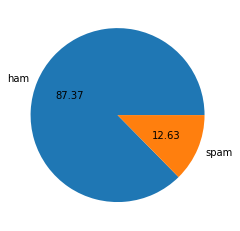

In [46]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [47]:
# data is imbalanced

In [49]:
import nltk

In [50]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/anasshaikh/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [62]:
df['num_characters'] = df['text'].apply(len)

TypeError: object of type 'float' has no len()

In [63]:
df.head()

,target,text,num_characters
0,0.0,"Go until jurong point, crazy.. Available only ...",111.0
1,0.0,Ok lar... Joking wif u oni...,29.0
2,1.0,Free entry in 2 a wkly comp to win FA Cup fina...,155.0
3,0.0,U dun say so early hor... U c already then say...,49.0
4,0.0,"Nah I don't think he goes to usf, he lives aro...",61.0


In [74]:
# num of words
df['num_words'] = df['text'].apply(str).apply(lambda x:len(nltk.word_tokenize(x)))

/var/folders/wc/6tt1m45j6t543xryt7398x7r0000gn/T/ipykernel_4336/3815364528.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words'] = df['text'].apply(str).apply(lambda x:len(nltk.word_tokenize(x)))


In [75]:
df.head()

,target,text,num_characters,num_words
0,0.0,"Go until jurong point, crazy.. Available only ...",111.0,24
1,0.0,Ok lar... Joking wif u oni...,29.0,8
2,1.0,Free entry in 2 a wkly comp to win FA Cup fina...,155.0,37
3,0.0,U dun say so early hor... U c already then say...,49.0,13
4,0.0,"Nah I don't think he goes to usf, he lives aro...",61.0,15


In [76]:
df['num_sentences'] = df['text'].apply(str).apply(lambda x:len(nltk.sent_tokenize(x)))

/var/folders/wc/6tt1m45j6t543xryt7398x7r0000gn/T/ipykernel_4336/2722318459.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sentences'] = df['text'].apply(str).apply(lambda x:len(nltk.sent_tokenize(x)))


In [77]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0.0,"Go until jurong point, crazy.. Available only ...",111.0,24,2
1,0.0,Ok lar... Joking wif u oni...,29.0,8,2
2,1.0,Free entry in 2 a wkly comp to win FA Cup fina...,155.0,37,2
3,0.0,U dun say so early hor... U c already then say...,49.0,13,1
4,0.0,"Nah I don't think he goes to usf, he lives aro...",61.0,15,1
